In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

# Tokenizing

In [0]:
tokenizer = Tokenizer()

data = open('sonnets.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1


# Create input sequences using list of tokens

In [0]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# Pad sequences 

In [0]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create predictors and label

In [0]:
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

# Model Layers

In [7]:
model = Sequential()
model.add(Embedding(total_words,150 , input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(158, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(200)))
model.add(Dense(1800, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 150)           481650    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 316)           390576    
_________________________________________________________________
dropout (Dropout)            (None, 10, 316)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 400)               827200    
_________________________________________________________________
dense (Dense)                (None, 1800)              721800    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5783011   
Total params: 8,204,237
Trainable params: 8,204,237
Non-trainable params: 0
______________________________________________

# Model Fitting

In [8]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 6s 13ms/step - loss: 7.0609 - accuracy: 0.0215
Epoch 2/100
484/484 [==============================] - 6s 13ms/step - loss: 6.5135 - accuracy: 0.0220
Epoch 3/100
484/484 [==============================] - 7s 14ms/step - loss: 6.4120 - accuracy: 0.0283
Epoch 4/100
484/484 [==============================] - 7s 14ms/step - loss: 6.2811 - accuracy: 0.0361
Epoch 5/100
484/484 [==============================] - 6s 13ms/step - loss: 6.1478 - accuracy: 0.0376
Epoch 6/100
484/484 [==============================] - 6s 13ms/step - loss: 6.0183 - accuracy: 0.0430
Epoch 7/100
484/484 [==============================] - 6s 13ms/step - loss: 5.8733 - accuracy: 0.0504
Epoch 8/100
484/484 [==============================] - 6s 13ms/step - loss: 5.7352 - accuracy: 0.0563
Epoch 9/100
484/484 [==============================] - 6s 13ms/step - loss: 5.6096 - accuracy: 0.0638
Epoch 10/100
484/484 [==============================] - 6s 13ms/step - loss: 5.470

# Accuracy and Loss Graph

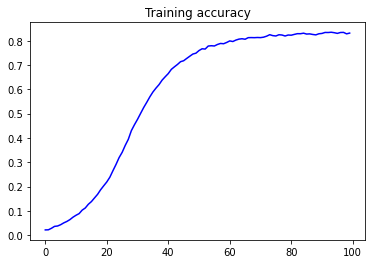

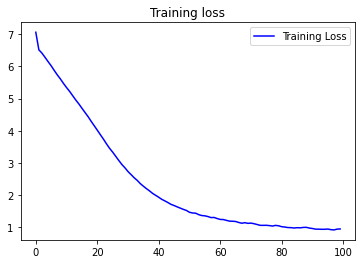

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

# Generating a poetry

In [11]:
#Enter starting line in seed_text for poetry generator
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope with woe and pride afar behind dead white did break away and buried face of me doth matter lines keep me seen faith erred dead clearer appear his cloak faith torn dead place away dead days affords days away kind ' well mother other convert remain go parts and near come clearer his chest show buried deeds of stay thy side away to keep convertest keep to stand of light away each 'will' and overplus it had dyed his gains expired sit away away days quite greater desire away was subdued afloat away of kings express too ' not doth
